In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score,confusion_matrix, r2_score
from sklearn.metrics import mean_absolute_error
from sklearn import preprocessing

In [2]:
train_orig=pd.read_csv('train-data.csv')

In [3]:
print('shape : ',train_orig.shape)
train_orig.head()

shape :  (6019, 14)


,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [4]:
train_orig.isnull().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [5]:
train_orig.drop(columns=['Unnamed: 0','New_Price'],inplace=True)
train_orig.dropna('index',inplace=True)
pd.DataFrame(train_orig)
train_orig.set_index('Name', inplace=True)
train = train_orig.reset_index()
train.shape
#New_Price열에 결측치가 너무 많아서 삭제

(5975, 12)

In [6]:
train.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [7]:
print('shape : ',train.shape)
train.head()

shape :  (5975, 12)


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


### name
브랜드명으로 바꾸기

In [8]:
name=train['Name']
len(np.unique(name))
#차종으로 하기는 너무 많다. 차종을 없애고 브랜드만 남겨두자

1855

In [9]:
for i in range(len(name)):
    name[i]=name[i].split(' ')[0]

<ipython-input-9-bec977aed009>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  name[i]=name[i].split(' ')[0]


In [10]:
len(name.unique())
#브랜드가 31개다.

31

### Mileage, Engine, Power
단위제거

In [11]:
mileage=train['Mileage']
engine=train['Engine']
power=train['Power']

In [12]:
for i in range(len(mileage)):
    mileage[i]=mileage[i].split(' ')[0]
    engine[i]=engine[i].split(' ')[0]
    power[i]=power[i].split(' ')[0]

<ipython-input-12-97c454a0a4bc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mileage[i]=mileage[i].split(' ')[0]
<ipython-input-12-97c454a0a4bc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  engine[i]=engine[i].split(' ')[0]
<ipython-input-12-97c454a0a4bc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  power[i]=power[i].split(' ')[0]


In [13]:
train['Mileage']=mileage
train['Engine']=engine
train['Power']=power
train['Name']=name

### Datatype

In [14]:
print(train.dtypes)

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
Price                float64
dtype: object


### 자료형변경

In [15]:
nu=[]
de=list(train['Power'])
for i in range(len(de)):
    if(de[i]=='null'):
        nu.append(i)
train=train.drop(nu)
train = train.reset_index(drop=True)
#결측치중에 문자열형으로 되어있는것 다시 제거

In [16]:
train['Price']=train['Price'].astype(float)
train['Kilometers_Driven']=train['Kilometers_Driven'].astype(float)
train['Mileage']=train['Mileage'].astype(float)
train['Engine']=train['Engine'].astype(float)
train['Power']=train['Power'].astype(float)
#Object 자료형을 float로 바꾼다

### One-hot encoding

In [17]:
#카테고리별로 분류
train['Year']=pd.Categorical(train['Year'])
train['Seats']=pd.Categorical(train['Seats'])

In [18]:
train=pd.get_dummies(train,prefix_sep='_',drop_first=True)

In [19]:
train.head()

,Kilometers_Driven,Mileage,Engine,Power,Price,Name_Audi,Name_BMW,Name_Bentley,Name_Chevrolet,Name_Datsun,...,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Seats_4.0,Seats_5.0,Seats_6.0,Seats_7.0,Seats_8.0,Seats_9.0,Seats_10.0
0,72000.0,26.60,998.0,58.16,1.75,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,41000.0,19.67,1582.0,126.20,12.50,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,46000.0,18.20,1199.0,88.70,4.50,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,87000.0,20.77,1248.0,88.76,6.00,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,40670.0,15.20,1968.0,140.80,17.74,1,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0


### Outlier 확인

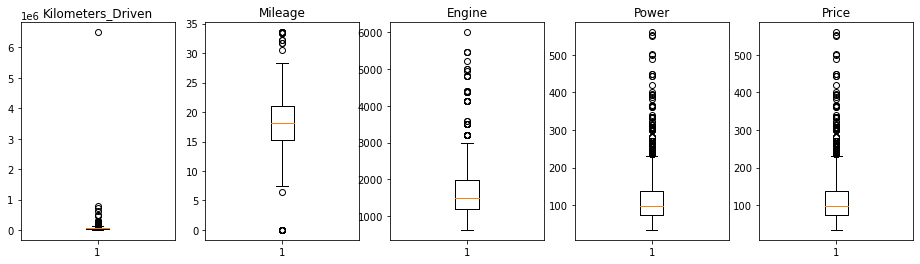

In [20]:
fig, ax =plt.subplots(1,5,figsize=(16,4))
ax[0].boxplot(list(train.Kilometers_Driven))
ax[0].set_title("Kilometers_Driven")

ax[1].boxplot(list(train.Mileage))
ax[1].set_title("Mileage")

ax[2].boxplot(list(train.Engine))
ax[2].set_title("Engine")

ax[3].boxplot(list(train.Power))
ax[3].set_title("Power")

ax[4].boxplot(list(train.Power))
ax[4].set_title("Price")

plt.show()

In [21]:
#Kilometers_Driven에 있는 이상치를 하나 제거하자
idx=[]
it=list(train['Kilometers_Driven'])
for i in range(len(it)):
    if(it[i]>1000000):
        idx.append(i)
train=train.drop(idx)
train=train.reset_index(drop=True)

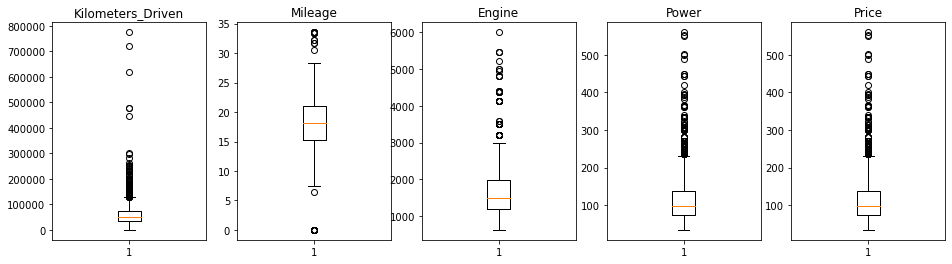

In [22]:
fig, ax =plt.subplots(1,5,figsize=(16,4))
ax[0].boxplot(list(train.Kilometers_Driven))
ax[0].set_title("Kilometers_Driven")

ax[1].boxplot(list(train.Mileage))
ax[1].set_title("Mileage")

ax[2].boxplot(list(train.Engine))
ax[2].set_title("Engine")

ax[3].boxplot(list(train.Power))
ax[3].set_title("Power")

ax[4].boxplot(list(train.Power))
ax[4].set_title("Price")

plt.show()

In [23]:
#제거가 끝났다.

### Dataset 만들기

In [24]:
y=train[['Price']].to_numpy()
train=train.drop(columns=['Price'])

In [25]:
x=train.values
columns=train.columns

scaler=preprocessing.MinMaxScaler()
tmp=scaler.fit_transform(x)
train=pd.DataFrame(tmp)
train.columns=columns

x=train.to_numpy()

In [26]:
#data split
x_train, x_test, y_train, y_test=train_test_split(x,y,train_size=0.8,random_state=1)

In [27]:
model=LinearRegression(fit_intercept=True,normalize=True,copy_X=True)
model.fit(x_train,y_train)

LinearRegression(normalize=True)

In [28]:
model.score(x_train,y_train)

0.8029093360061492